# 2 - Quadratic Network

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
np.random.shuffle(train_df.values)

print(train_df.head())

          x          y  color
0  0.348447   2.100028    0.0
1 -4.273834  20.062104    0.0
2 -2.300751   6.828973    0.0
3 -1.107504   2.657976    0.0
4 -3.279362   8.996437    1.0


# Plotting Data

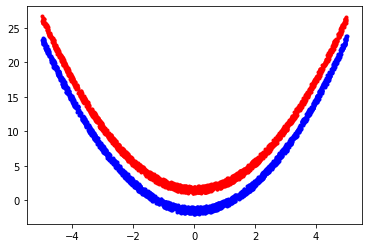

In [3]:
df1 = train_df[train_df.color==0]
df2 = train_df[train_df.color==1]

plt.scatter(df1.x, df1.y, marker = '.', color='red')
plt.scatter(df2.x, df2.y, marker = '.', color='blue')

plt.show()

# Sequencial API

In [4]:
# model = keras.Sequential([
# 	keras.layers.Dense(32, input_shape=(2,), activation='relu'),
# 	keras.layers.Dense(32, activation='relu'),
# 	keras.layers.Dense(2, activation='sigmoid')])

# Functional API

In [5]:
# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(32, activation='relu', name='First_layer')(inputs)
x = keras.layers.Dense(32, activation='relu', name='Second_layer')(x)
outputs = keras.layers.Dense(2, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 32)                96        
_________________________________________________________________
Second_layer (Dense)         (None, 32)                1056      
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 1,218
Trainable params: 1,218
Non-trainable params: 0
_________________________________________________________________
None


# Modal Training

In [12]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

x = np.column_stack((train_df.x.values, train_df.y.values))
y = train_df.color.values

In [13]:
model.fit(x, y, batch_size=4, epochs=10, verbose=2)

Epoch 1/10
1000/1000 - 2s - loss: 0.3238 - accuracy: 0.9927
Epoch 2/10
1000/1000 - 1s - loss: 0.3220 - accuracy: 0.9942
Epoch 3/10
1000/1000 - 1s - loss: 0.3297 - accuracy: 0.9847
Epoch 4/10
1000/1000 - 1s - loss: 0.3180 - accuracy: 0.9967
Epoch 5/10
1000/1000 - 1s - loss: 0.3191 - accuracy: 0.9958
Epoch 6/10
1000/1000 - 2s - loss: 0.3491 - accuracy: 0.9640
Epoch 7/10
1000/1000 - 1s - loss: 0.3307 - accuracy: 0.9815
Epoch 8/10
1000/1000 - 1s - loss: 0.3146 - accuracy: 0.9998
Epoch 9/10
1000/1000 - 1s - loss: 0.3286 - accuracy: 0.9852
Epoch 10/10
1000/1000 - 1s - loss: 0.3268 - accuracy: 0.9860


# Test Data Evaluation

In [14]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))
test_y = test_df.color.values
print("EVALUATION")
model.evaluate(test_x, test_y)

EVALUATION
32/32 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 1.0000


[0.3136707842350006, 1.0]

# Test Data Plot

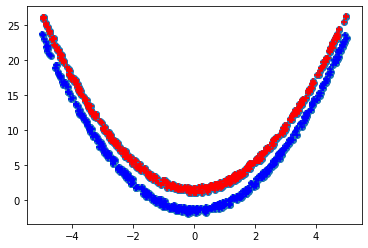

In [9]:
plt.scatter(test_df.x,test_df.y)

df1 = test_df[test_df.color==0]
df2 = test_df[test_df.color==1]

plt.scatter(df1.x, df1.y, marker = '+', color='red')
plt.scatter(df2.x, df2.y, marker = '+', color='blue')

plt.show()

# Plotting Hyperplane ( Training Data )

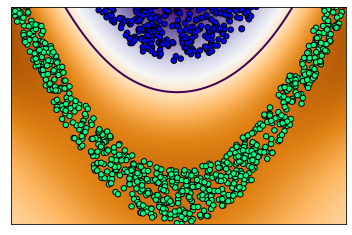

In [23]:
# plot the decision function for each datapoint on the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
           aspect="auto", origin="lower", cmap=plt.cm.PuOr_r,)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)

plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap='winter', edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

# Plotting Hyperplane ( Test Data )

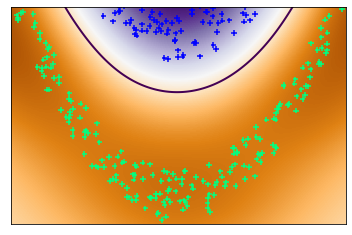

In [24]:
# plot the decision function for each datapoint on the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
           aspect="auto", origin="lower", cmap=plt.cm.PuOr_r,)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)

plt.scatter(test_x[:, 0], test_x[:, 1], s=30, c=test_df.color.values, cmap='winter', marker='+', edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
if epochs == 1:
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)
    plt.scatter(x[:, 0], x[:, 1], s=30, c=test_df.color.values, cmap='winter', marker='+', edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis([-2, 2, -2, 2])
    plt.show()
    
if epochs == 3:
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)
    plt.scatter(x[:, 0], x[:, 1], s=30, c=test_df.color.values, cmap='winter', marker='+', edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis([-2, 2, -2, 2])
    plt.show()
    
if epochs == 5:
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,)
    plt.scatter(x[:, 0], x[:, 1], s=30, c=test_df.color.values, cmap='winter', marker='+', edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis([-2, 2, -2, 2])
    plt.show()

# Plots